# Introduction

New York City's demographics show that it is a large and ethnically diverse metropolis. It is the largest city in the United States with a long history of international immigration. New York City was home to nearly 8.5 million people in 2014, accounting for over 40% of the population of New York State and a slightly lower percentage of the New York metropolitan area, home to approximately 23.6 million. Over the last decade the city has been growing faster than the region. The New York region continues to be by far the leading metropolitan gateway for legal immigrants admitted into the United States.
​
Throughout its history, New York City has been a major point of entry for immigrants; the term "melting pot" was coined to describe densely populated immigrant neighborhoods on the Lower East Side. As many as 800 languages are spoken in New York, making it the most linguistically diverse city in the world. English remains the most widely spoken language, although there are areas in the outer boroughs in which up to 25% of people speak English as an alternate language, and/or have limited or no English language fluency. English is least spoken in neighborhoods such as Flushing, Sunset Park, and Corona.
​
With it's diverse culture , comes diverse food items. There are many restaurants in New york City, each belonging to different categories like Chinese , Italian, Indian , French etc.
​
So as part of this project , we will list and visualize all major parts of New York City that has great Chinese restaurants.

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>

1. <a href="#item1">Datasets</a>

2. <a href="#item2">Approach</a>

3. <a href="#item3">Questions that can be answered using the above datasets</a>

4. <a href="#item4">Analysis</a>

   
</font>
</div>

## 1. Datasets

Data
For this project we need the following data :

New York City data that contains list Boroughs, Neighborhoods along with their latitude and longitude.
Data source : https://cocl.us/new_york_dataset
Description : This data set contains the required information. And we will use this data set to explore various neighborhoods of new york city.
Chinese restaurants in each neighborhood of new york city.
Data source : Fousquare API
Description : By using this api we will get all the venues in each neighborhood. We can filter these venues to get only Chinese restaurants.
GeoSpace data
Data source : https://data.cityofnewyork.us/City-Government/Borough-Boundaries/tqmj-j8zm
Description : By using this geo space data we will get the New york Borough boundaries that will help us visualize choropleth map.

 ## 2. Approach

 - Collect the new york city data from https://cocl.us/new_york_dataset
 - Using FourSquare API we will find all venues for each neighborhood.
 - Filter out all venues that are Chinese Restaurants.
 - Find rating , tips and like count for each Chinese Restaurants using FourSquare API.
 - Using rating for each restaurant , we will sort that data.
 - Visualize the Ranking of neighborhoods using folium library(python)

## 3. Questions that can be answered using the above datasets

 - What is best location in New York City for Chinese Cuisine ?
 - Which areas have potential Chinese Restaurant Market ?
 - Which all areas lack Chinese Restaurants ?
 - Which is the best place to stay if I prefer Chinese Cuisine ?

## 4. Analysis

## 1. Datasets

## Required Libraries

 - pandas and numpy for handling data.
 - request module for using FourSquare API.
 - geopy to get co-ordinates of City of New York.
 - folium to visualize the results on a map

In [1]:
 !pip install watson-developer-cloud==1.5

     |████████████████████████████████| 225kB 10.6MB/s eta 0:00:01
     |████████████████████████████████| 1.1MB 16.9MB/s eta 0:00:01
     |████████████████████████████████| 3.1MB 46.5MB/s eta 0:00:01
     |████████████████████████████████| 2.7MB 40.3MB/s eta 0:00:01
     |████████████████████████████████| 235kB 44.7MB/s eta 0:00:01
     |████████████████████████████████| 61kB 28.0MB/s eta 0:00:01
     |████████████████████████████████| 81kB 29.4MB/s eta 0:00:01
     |████████████████████████████████| 163kB 48.1MB/s eta 0:00:01
  Stored in directory: /home/dsxuser/.cache/pip/wheels/81/cd/de/4e0916f623c2d125502e493394fd333ed693960264d4b7e524
Successfully built watson-developer-cloud
  Found existing installation: cryptography 2.5
    Uninstalling cryptography-2.5:
      Successfully uninstalled cryptography-2.5
  Found existing installation: attrs 18.2.0
    Uninstalling attrs-18.2.0:
      Successfully uninstalled attrs-18.2.0


In [2]:
 !pip install geocoder

     |████████████████████████████████| 102kB 6.5MB/s ta 0:00:011


In [3]:
 !pip install geopy

In [4]:
 !pip install folium

     |████████████████████████████████| 92kB 7.0MB/s eta 0:00:011


In [5]:
!pip install beautifulsoup4

In [6]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import requests
import sys
from bs4 import BeautifulSoup
import geocoder
import os
import folium # map rendering library
from geopy.geocoders import Nominatim 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import json
%matplotlib inline
from pandas.io.json import json_normalize
import folium
from geopy.geocoders import Nominatim 
import requests


print('Libraries imported.')

Libraries imported.


### User Credentials

In [19]:
CLIENT_ID = 'LU3414NYO355MM5D0VY0E2JJZ1BSAHMZLSLZEMN32J1C2PQ0' # changed my Foursquare ID
CLIENT_SECRET = 'PUBIS40LAXV2N3PRP3QXWKYQBRXJOMPQJFEPKNPYDH5KRWNN' # changed Foursquare Secret

Now we define a function to get the geocodes i.e latitude and longitude of a given location using geopy.

In [20]:
def geo_location(address):
    # get geo location of address
    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude,longitude

We define a function to intract with FourSquare API and get top 100 venues within a radius of 1000 metres for a given latitude and longitude. Below function will return us the venue id , venue name and category.

In [21]:
def get_venues(lat,lng):
    
    #set variables
    radius=1000
    LIMIT=100
    VERSION = '20200326' # Foursquare API version
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results["response"]['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
        
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    print("done")
    return df

Now we will define a function to get venue details like like count , rating , tip counts for a given venue id. This will be used for ranking.

In [22]:
def get_venue_details(venue_id):
    VERSION = '20200326' # Foursquare API version
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
        
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

Now we define a funtion to get the new york city data such as Boroughs, Neighborhoods along with their latitude and longitude.

In [23]:
def get_new_york_data():
    url='https://cocl.us/new_york_dataset'
    resp=requests.get(url).json()
    # all data is present in features label
    features=resp['features']
    
    # define the dataframe columns
    column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
    # instantiate the dataframe
    new_york_data = pd.DataFrame(columns=column_names)
    
    for data in features:
        borough = data['properties']['borough'] 
        neighborhood_name = data['properties']['name']
        
        neighborhood_latlon = data['geometry']['coordinates']
        neighborhood_lat = neighborhood_latlon[1]
        neighborhood_lon = neighborhood_latlon[0]
    
        new_york_data = new_york_data.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
    
    return new_york_data


We will call the above funtion to get the new york city data.

In [24]:
# get new york data
new_york_data=get_new_york_data()
new_york_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [25]:
new_york_data.shape

(306, 4)

#### There are total 306 places in New York which need to be searched for the restaurants.

#### Save the all restaurent in New York data as .csv file for further use

In [26]:
new_york_data.to_csv('new_york_data_before_filter.csv')

In [27]:
new_york_data_1 = pd.read_csv("new_york_data_before_filter.csv")
new_york_data_1.drop(['Unnamed: 0'], axis=1, inplace=True)
new_york_data_1.shape
new_york_data_1.head(10)

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585
5,Bronx,Kingsbridge,40.881687,-73.902818
6,Manhattan,Marble Hill,40.876551,-73.910660
7,Bronx,Woodlawn,40.898273,-73.867315
8,Bronx,Norwood,40.877224,-73.879391
9,Bronx,Williamsbridge,40.881039,-73.857446


In [28]:
#b=new_york_data_1.groupby('Latitude').count()

#b=np.unique(new_york_data_1['Longitude'], axis=0)
#b.shape
#new_york_data_1.duplicated()

#### Plot of Number of Neighborhood with respect to Borough in New York City

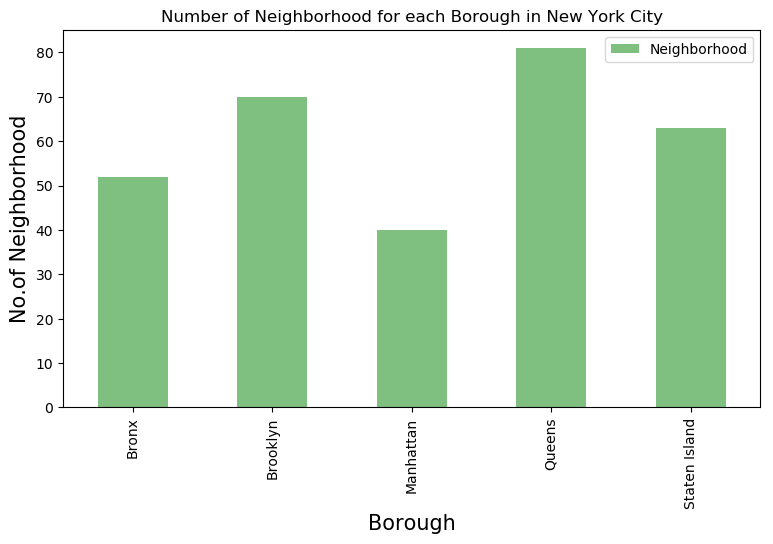

In [29]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Neighborhood for each Borough in New York City')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Neighborhood', fontsize=15)
#giving a bar plot
new_york_data.groupby('Borough')['Neighborhood'].count().plot(kind='bar', color=['green'],alpha=0.5, stacked=True)
#legend
plt.legend()
#displays the plot
plt.show()

 #### Queens has highest number of neighborhoods

#### Now we will collect informations of Chinese restaurants for each Neighborhood

In [30]:
# prepare neighborhood list that contains chinese restaurant
column_names=['Borough', 'Neighborhood', 'ID','Name']
chinese_rest_ny=pd.DataFrame(columns=column_names)
count=1
for row in new_york_data.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    chinese_resturants=venues[venues['Category']=='Chinese Restaurant']   
    print('(',count,'/',len(new_york_data),')','chinese Resturants in '+Neighborhood+', '+Borough+':'+str(len(chinese_resturants)))
    for resturant_detail in chinese_resturants.values.tolist():
        id, name , category=resturant_detail
        chinese_rest_ny = chinese_rest_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1

done
( 1 / 306 ) chinese Resturants in Wakefield, Bronx:1
done
( 2 / 306 ) chinese Resturants in Co-op City, Bronx:2
done
( 3 / 306 ) chinese Resturants in Eastchester, Bronx:0
done
( 4 / 306 ) chinese Resturants in Fieldston, Bronx:1
done
( 5 / 306 ) chinese Resturants in Riverdale, Bronx:0
done
( 6 / 306 ) chinese Resturants in Kingsbridge, Bronx:0
done
( 7 / 306 ) chinese Resturants in Marble Hill, Manhattan:1
done
( 8 / 306 ) chinese Resturants in Woodlawn, Bronx:1
done
( 9 / 306 ) chinese Resturants in Norwood, Bronx:3
done
( 10 / 306 ) chinese Resturants in Williamsbridge, Bronx:0
done
( 11 / 306 ) chinese Resturants in Baychester, Bronx:2
done
( 12 / 306 ) chinese Resturants in Pelham Parkway, Bronx:4
done
( 13 / 306 ) chinese Resturants in City Island, Bronx:1
done
( 14 / 306 ) chinese Resturants in Bedford Park, Bronx:3
done
( 15 / 306 ) chinese Resturants in University Heights, Bronx:0
done
( 16 / 306 ) chinese Resturants in Morris Heights, Bronx:2
done
( 17 / 306 ) chinese R

Now that we have got all the Chinese resturants in new york city , we will analyze it

In [33]:
chinese_rest_ny.head()

,Borough,Neighborhood,ID,Name
0,Bronx,Wakefield,4edbac4e775bcc53fc0ed5f8,Hong Kong China King
1,Bronx,Co-op City,4c9d5f2654c8a1cd2e71834b,Guang Hui Chinese Restaurant
2,Bronx,Co-op City,4c66dcfaaebea593955a74d0,Chinese Buffet
3,Bronx,Fieldston,4f5543a7e4b0ac8e5378b9de,Broadway Chinese Kitchen
4,Manhattan,Marble Hill,4d965fd061a3a1cde4989a42,Lucky Star Chinese Restaurant


In [34]:
chinese_rest_ny.shape

(396, 4)

#### Save the all data of Chinese restaurents in New York as .csv file for further use

In [35]:
chinese_rest_ny.to_csv('chinese_rest_ny.csv')

In [36]:
new_york_data_1.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [37]:
chinese_rest_ny = pd.read_csv("chinese_rest_ny.csv")
chinese_rest_ny_1 = pd.read_csv("chinese_rest_ny.csv")


#### Filter the data of Chinese restaurents in New York for the duplicates 

In [38]:
c=chinese_rest_ny_1['Name'].duplicated()
#d=chinese_rest_ny_1.drop_duplicates(['Name'], keep='last')
chinese_rest_ny_1.drop_duplicates(subset ="Name", 
                     keep = False, inplace = True)

In [39]:
chinese_rest_ny_1.shape

(196, 5)

In [40]:
chinese_rest_ny_1.drop(['Unnamed: 0'], axis=1, inplace=True)
chinese_rest_ny_1.shape

(196, 4)

In [41]:
display(chinese_rest_ny_1.head(10),new_york_data_1.head(10))

,Borough,Neighborhood,ID,Name
1,Bronx,Co-op City,4c9d5f2654c8a1cd2e71834b,Guang Hui Chinese Restaurant
2,Bronx,Co-op City,4c66dcfaaebea593955a74d0,Chinese Buffet
3,Bronx,Fieldston,4f5543a7e4b0ac8e5378b9de,Broadway Chinese Kitchen
9,Bronx,Baychester,4eadecbf9911d5c95181ee84,Yummy House
10,Bronx,Baychester,4e4df7a7bd4101d0d79f46f2,Golden Star Garden
13,Bronx,Pelham Parkway,4c7dbf7f10916dcba78e2a96,Chef King
15,Bronx,City Island,4bfc652bf14fa593c1f5c9d4,City Island Chinese Resturant
20,Bronx,Morris Heights,4f32b5d419836c91c7f21e76,Number One Chinese Restaurant
24,Bronx,Melrose,4e0a2d13a809495e61abc928,New Wok
25,Bronx,Melrose,4d8c0a6e9f3fb1f7f646ffbc,Little Chopsticks Kitchen


,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585
5,Bronx,Kingsbridge,40.881687,-73.902818
6,Manhattan,Marble Hill,40.876551,-73.910660
7,Bronx,Woodlawn,40.898273,-73.867315
8,Bronx,Norwood,40.877224,-73.879391
9,Bronx,Williamsbridge,40.881039,-73.857446


#### There are total 196 different Chinese restaurants in the New York City

#### Now we will mark all Chinese restaurants on New York map

In [42]:
ny_neighborhood =pd.merge(chinese_rest_ny_1,new_york_data_1)
ny_neighborhood.head(200)
#ny_neighborhood = chinese_rest_ny_1.join(new_york_data_1, "Borough") 
#ny_neighborhood

,Borough,Neighborhood,ID,Name,Latitude,Longitude
0,Bronx,Co-op City,4c9d5f2654c8a1cd2e71834b,Guang Hui Chinese Restaurant,40.874294,-73.829939
1,Bronx,Co-op City,4c66dcfaaebea593955a74d0,Chinese Buffet,40.874294,-73.829939
2,Bronx,Fieldston,4f5543a7e4b0ac8e5378b9de,Broadway Chinese Kitchen,40.895437,-73.905643
3,Bronx,Baychester,4eadecbf9911d5c95181ee84,Yummy House,40.866858,-73.835798
4,Bronx,Baychester,4e4df7a7bd4101d0d79f46f2,Golden Star Garden,40.866858,-73.835798
5,Bronx,Pelham Parkway,4c7dbf7f10916dcba78e2a96,Chef King,40.857413,-73.854756
6,Bronx,City Island,4bfc652bf14fa593c1f5c9d4,City Island Chinese Resturant,40.847247,-73.786488
7,Bronx,Morris Heights,4f32b5d419836c91c7f21e76,Number One Chinese Restaurant,40.847898,-73.919672
8,Bronx,Melrose,4e0a2d13a809495e61abc928,New Wok,40.819754,-73.909422
9,Bronx,Melrose,4d8c0a6e9f3fb1f7f646ffbc,Little Chopsticks Kitchen,40.819754,-73.909422


In [43]:
locations = ny_neighborhood[['Latitude', 'Longitude']]
locationlist = locations.values.tolist()
len(locationlist)
#locationlist[1]

196

#### The location list will be used to markdown on the Folium map

In [44]:
map = folium.Map(location=[40.730610, -73.935242], zoom_start = 10)
for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point], popup=ny_neighborhood['Name'][point]).add_to(map)
map

## To be continued in "Battle of Neighborhood Week- 2"

## Comparison(no. of chinese restaurants) between different Boroughs of New York city

#### Plot of number of Chinese Restaurants for each Borough in New York City

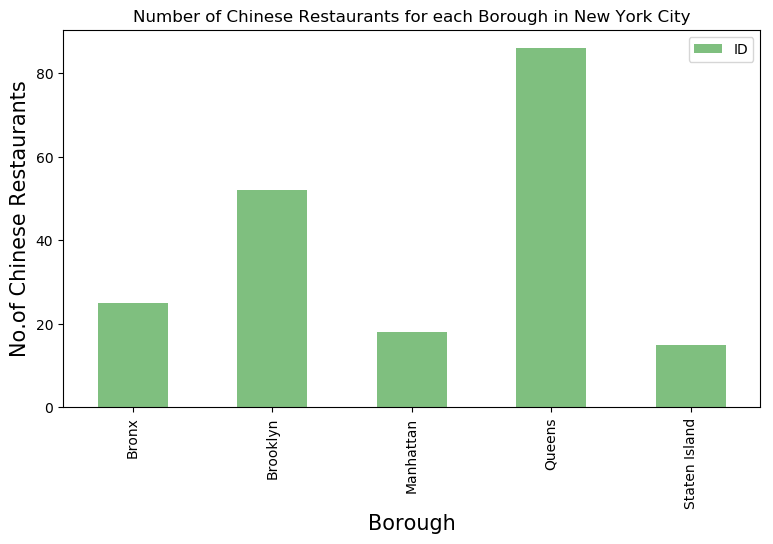

In [46]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Chinese Restaurants for each Borough in New York City')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Chinese Restaurants', fontsize=15)
#giving a bar plot
ny_neighborhood.groupby('Borough')['ID'].count().plot(kind='bar', color='green',alpha=0.5)
#legend
plt.legend()
#displays the plot
plt.show()

#### We see that Queens has the largest number of Chinese restaurants

#### How many Neighborhoods of Queens's have Chinese restaurants ?

In [47]:
ny_neighborhood[ny_neighborhood['Borough']=='Queens'].groupby('Neighborhood').nunique().count()

Borough         45
Neighborhood    45
ID              45
Name            45
Latitude        45
Longitude       45
dtype: int64

#### 45 Neighborhoods of Queens's have Chinese restaurants

In [48]:
ny_neighborhood.groupby('Borough').count()

,Neighborhood,ID,Name,Latitude,Longitude
Borough,,,,,
Bronx,25,25,25,25,25
Brooklyn,52,52,52,52,52
Manhattan,18,18,18,18,18
Queens,86,86,86,86,86
Staten Island,15,15,15,15,15


## Comparison (no. of chinese restaurants) between different Neighborhoods of each Borough

## Queens

#### Plot of number of Chinese Restaurants for each Neighborhood in Queens (New York City)

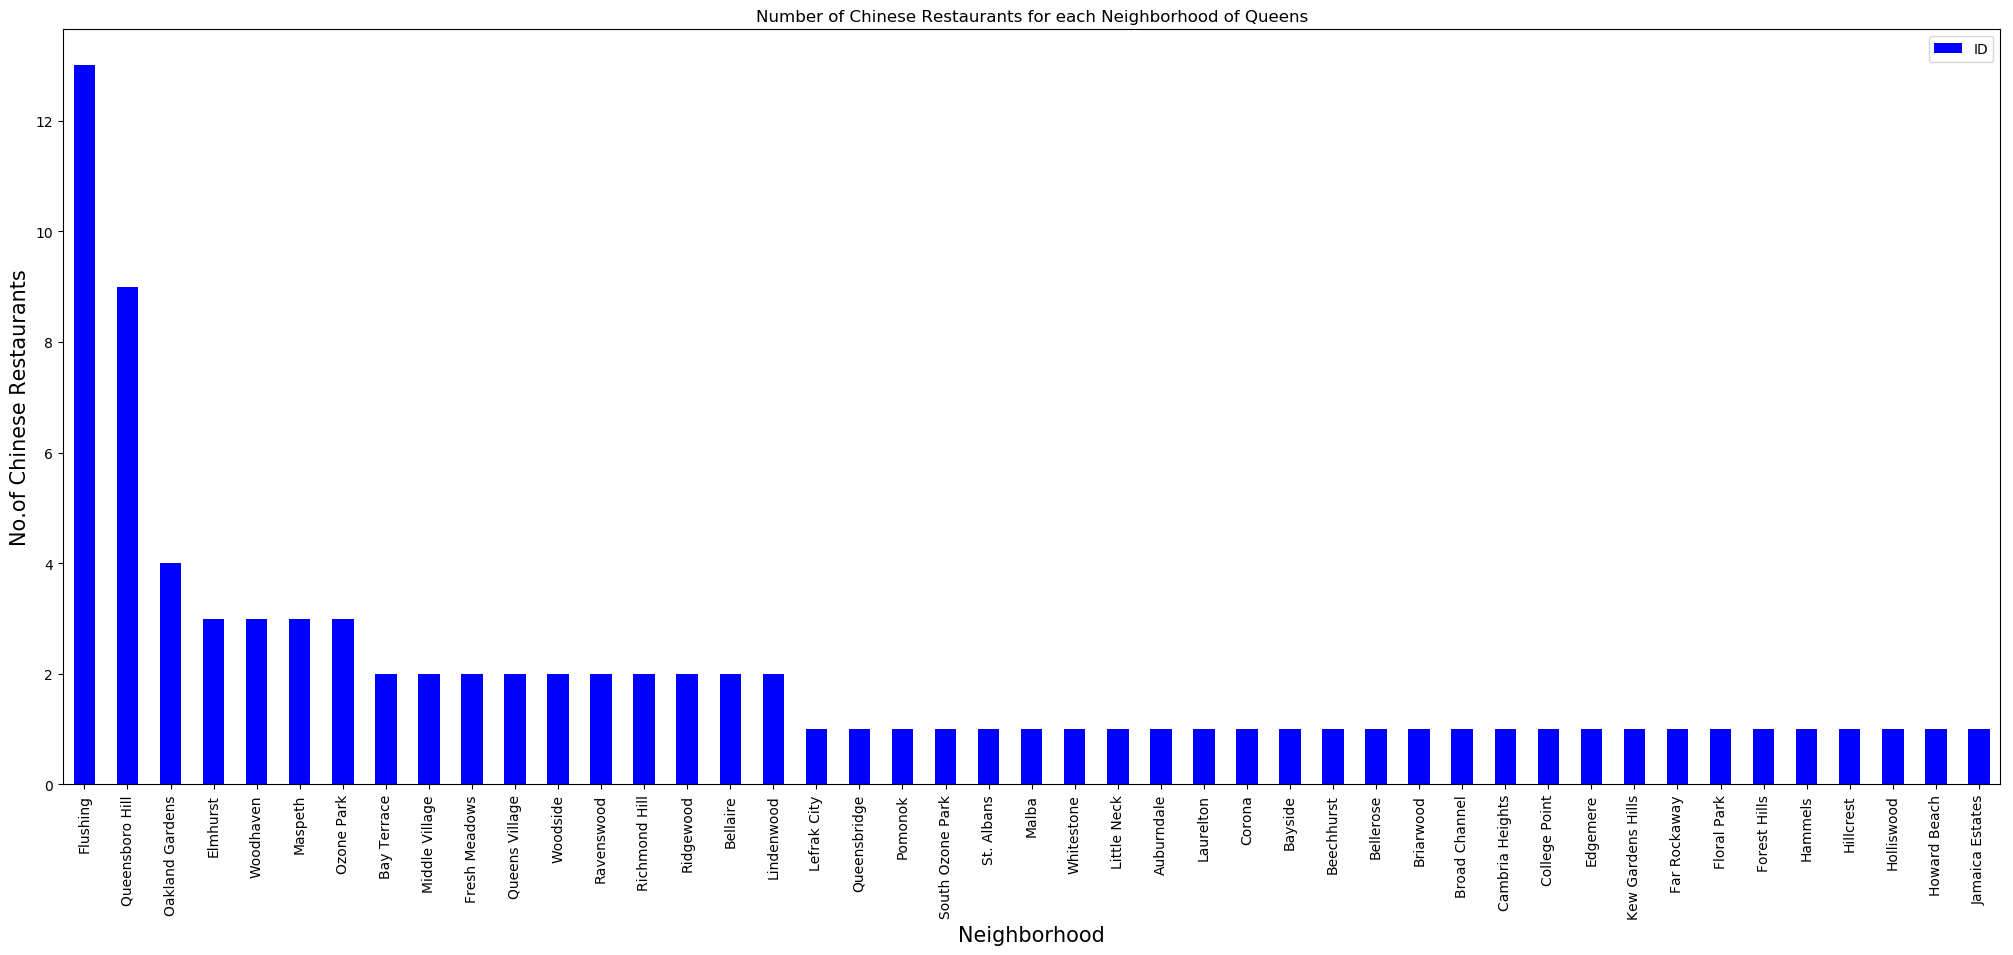

In [51]:
plt.figure(figsize=(25,10), dpi = 100)
# title
plt.title('Number of Chinese Restaurants for each Neighborhood of Queens')
#On x-axis
plt.xlabel('Neighborhood', fontsize = 15)
#On y-axis
plt.ylabel('No.of Chinese Restaurants', fontsize=15)
#giving a bar plot
#ny_neighborhood.groupby('Neighborhood')['ID'].count().nlargest().plot(kind='bar')
ny_neighborhood[ny_neighborhood['Borough']=='Queens'].groupby('Neighborhood')['ID'].count().nlargest(90).plot(kind='bar', color='blue')
#legend
plt.legend()
#displays the plot
plt.show()

#### We see that Flushing has the largest number of Chinese restaurants

In [50]:
ny_neighborhood[ny_neighborhood['Neighborhood']=='Flushing'].count()

Borough         13
Neighborhood    13
ID              13
Name            13
Latitude        13
Longitude       13
dtype: int64

#### There are 13 Chinese restaurant in Flushing

## Bronx

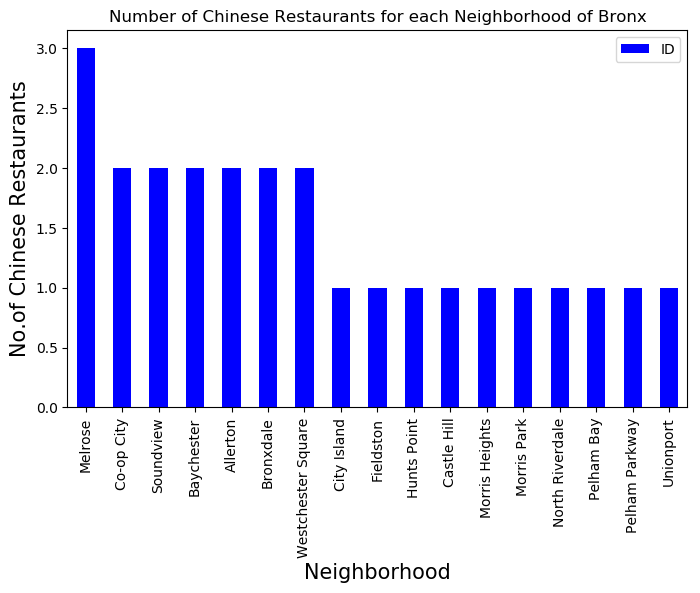

In [52]:
plt.figure(figsize=(8,5), dpi = 100)
# title
plt.title('Number of Chinese Restaurants for each Neighborhood of Bronx')
#On x-axis
plt.xlabel('Neighborhood', fontsize = 15)
#On y-axis
plt.ylabel('No.of Chinese Restaurants', fontsize=15)
#giving a bar plot
#ny_neighborhood.groupby('Neighborhood')['ID'].count().nlargest().plot(kind='bar')
ny_neighborhood[ny_neighborhood['Borough']=='Bronx'].groupby('Neighborhood')['ID'].count().nlargest(90).plot(kind='bar',color='blue')
#legend
plt.legend()
#displays the plot
plt.show()

## Brooklyn

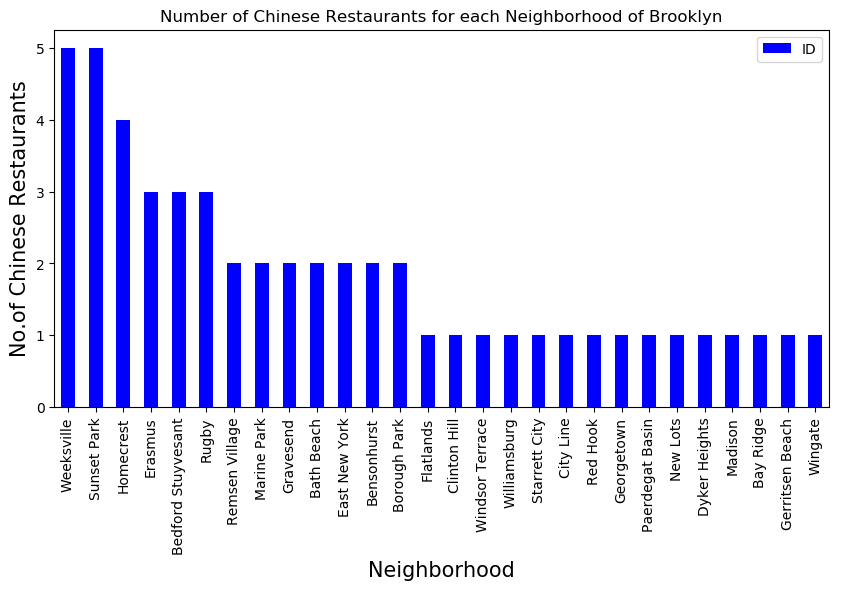

In [53]:
plt.figure(figsize=(10,5), dpi = 100)
# title
plt.title('Number of Chinese Restaurants for each Neighborhood of Brooklyn')
#On x-axis
plt.xlabel('Neighborhood', fontsize = 15)
#On y-axis
plt.ylabel('No.of Chinese Restaurants', fontsize=15)
#giving a bar plot
#ny_neighborhood.groupby('Neighborhood')['ID'].count().nlargest().plot(kind='bar')
ny_neighborhood[ny_neighborhood['Borough']=='Brooklyn'].groupby('Neighborhood')['ID'].count().nlargest(90).plot(kind='bar',color='blue')
#legend
plt.legend()
#displays the plot
plt.show()

## Manhattan

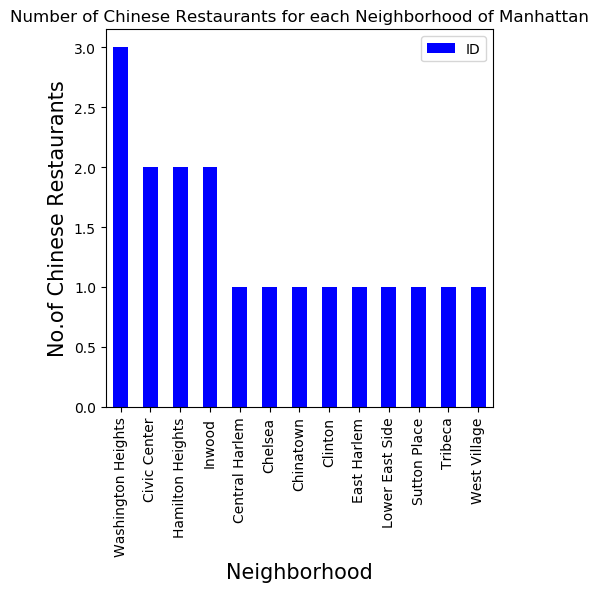

In [54]:
plt.figure(figsize=(5,5), dpi = 100)
# title
plt.title('Number of Chinese Restaurants for each Neighborhood of Manhattan')
#On x-axis
plt.xlabel('Neighborhood', fontsize = 15)
#On y-axis
plt.ylabel('No.of Chinese Restaurants', fontsize=15)
#giving a bar plot
#ny_neighborhood.groupby('Neighborhood')['ID'].count().nlargest().plot(kind='bar')
ny_neighborhood[ny_neighborhood['Borough']=='Manhattan'].groupby('Neighborhood')['ID'].count().nlargest(90).plot(kind='bar',color='blue')
#legend
plt.legend()
#displays the plot
plt.show()

## Staten Island

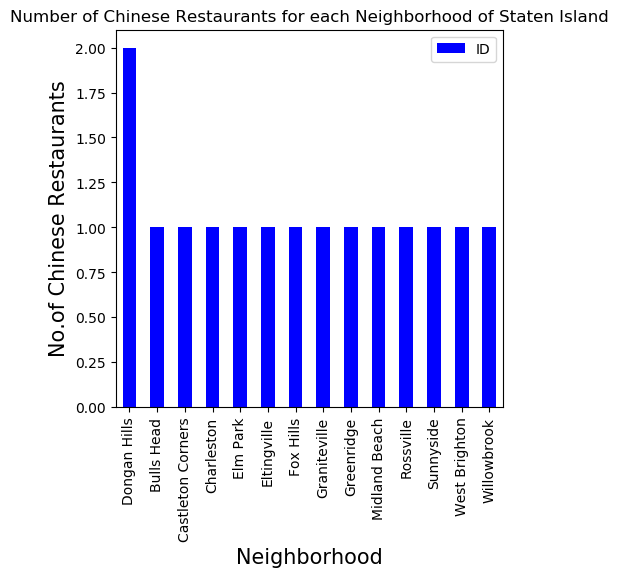

In [55]:
plt.figure(figsize=(5,5), dpi = 100)
# title
plt.title('Number of Chinese Restaurants for each Neighborhood of Staten Island')
#On x-axis
plt.xlabel('Neighborhood', fontsize = 15)
#On y-axis
plt.ylabel('No.of Chinese Restaurants', fontsize=15)
#giving a bar plot
#ny_neighborhood.groupby('Neighborhood')['ID'].count().nlargest().plot(kind='bar')
ny_neighborhood[ny_neighborhood['Borough']=='Staten Island'].groupby('Neighborhood')['ID'].count().nlargest(90).plot(kind='bar',color='blue')
#legend
plt.legend()
#displays the plot
plt.show()

#### Now we will use Four square API premium calls to find out all details(e.g. ratings, likes etc.) of the Chinese Restaurants

In [56]:
# prepare neighborhood list that contains chinese resturants
column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
chinese_rest_stats_ny=pd.DataFrame(columns=column_names)
count=1
for row in chinese_rest_ny_1.values.tolist():
    Borough,Neighborhood,ID,Name=row
    try:
        venue_details=get_venue_details(ID)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=',ID)
        # we will assign 0 value for these resturants as they may have been 
        #recently opened or details does not exist in FourSquare Database
        id,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(chinese_rest_ny_1),')','processed')
    chinese_rest_stats_ny = chinese_rest_stats_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1

Empty DataFrame
Columns: [ID, Name, Likes, Rating, Tips]
Index: []
No data available for id= 4c9d5f2654c8a1cd2e71834b
( 1 / 196 ) processed
                         ID            Name  Likes  Rating  Tips
0  4c66dcfaaebea593955a74d0  Chinese Buffet      7     4.9    10
( 2 / 196 ) processed
Empty DataFrame
Columns: [ID, Name, Likes, Rating, Tips]
Index: []
No data available for id= 4f5543a7e4b0ac8e5378b9de
( 3 / 196 ) processed
Empty DataFrame
Columns: [ID, Name, Likes, Rating, Tips]
Index: []
No data available for id= 4eadecbf9911d5c95181ee84
( 4 / 196 ) processed
Empty DataFrame
Columns: [ID, Name, Likes, Rating, Tips]
Index: []
No data available for id= 4e4df7a7bd4101d0d79f46f2
( 5 / 196 ) processed
Empty DataFrame
Columns: [ID, Name, Likes, Rating, Tips]
Index: []
No data available for id= 4c7dbf7f10916dcba78e2a96
( 6 / 196 ) processed
                         ID                           Name  Likes  Rating  \
0  4bfc652bf14fa593c1f5c9d4  City Island Chinese Resturant      6     6

In [57]:
chinese_rest_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 7 columns):
Borough         196 non-null object
Neighborhood    196 non-null object
ID              196 non-null object
Name            196 non-null object
Likes           196 non-null object
Rating          196 non-null object
Tips            196 non-null object
dtypes: object(7)
memory usage: 10.8+ KB


#### Converting the columns corresponding to the 'Likes' and 'Tips' to float64 data type

In [58]:
chinese_rest_stats_ny['Likes']=chinese_rest_stats_ny['Likes'].astype('float64')
chinese_rest_stats_ny['Tips']=chinese_rest_stats_ny['Tips'].astype('float64')
chinese_rest_stats_ny['Rating']=chinese_rest_stats_ny['Rating'].astype('float64')

In [59]:
chinese_rest_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 7 columns):
Borough         196 non-null object
Neighborhood    196 non-null object
ID              196 non-null object
Name            196 non-null object
Likes           196 non-null float64
Rating          196 non-null float64
Tips            196 non-null float64
dtypes: float64(3), object(4)
memory usage: 10.8+ KB


## Joining the datasheets for combining all informations of the Chinese restaurants in New York

In [60]:
ny_neighborhood.shape,chinese_rest_stats_ny.shape

((196, 6), (196, 7))

In [61]:
#chinese_all =pd.merge(ny_neighborhood,chinese_rest_stats_ny, how = 'inner')
#chinese_all =pd.merge(ny_neighborhood,chinese_rest_stats_ny, how = 'outer')
chinese_all =pd.merge(ny_neighborhood,chinese_rest_stats_ny)
chinese_all.tail(200)

,Borough,Neighborhood,ID,Name,Latitude,Longitude,Likes,Rating,Tips
0,Bronx,Co-op City,4c66dcfaaebea593955a74d0,Chinese Buffet,40.874294,-73.829939,7.0,4.9,10.0
1,Bronx,City Island,4bfc652bf14fa593c1f5c9d4,City Island Chinese Resturant,40.847247,-73.786488,6.0,6.3,4.0
2,Bronx,North Riverdale,4ca4fda4d971b1f77da5f2e0,Golden Phoenix Chinese Restaurant,40.908543,-73.904531,4.0,5.7,1.0
3,Brooklyn,Bay Ridge,5553702c498ecb85f99d8f37,XIN,40.625801,-74.030621,6.0,7.4,4.0
4,Brooklyn,Bensonhurst,574a1a53498e6a1b7cb336cb,Orchid Dynasty,40.611009,-73.995180,6.0,7.7,1.0
5,Brooklyn,Bensonhurst,4c65da95f7a80f47b6959c7a,Spicy Bampa,40.611009,-73.995180,28.0,7.3,10.0
6,Brooklyn,Sunset Park,51d868ac498ef583276dcf4b,Yun Nan Flavour Garden,40.645103,-74.010316,94.0,8.1,44.0
7,Brooklyn,Sunset Park,4bfaf805d0382d7f520ac90a,China Delight,40.645103,-74.010316,9.0,8.0,7.0
8,Brooklyn,Sunset Park,4d783c6a930ef04dac0fb44f,Restaurant On 58st Inc. (勝記小館),40.645103,-74.010316,12.0,7.5,2.0
9,Brooklyn,Sunset Park,4b6c63e0f964a5201f362ce3,Lucky Eight 同樂小炒皇,40.645103,-74.010316,36.0,6.8,20.0


In [62]:
chinese_all.shape

(107, 9)

## Out of 196 chinese restaurants only 107 restaurants have "Likes", "Ratings" and "Tips"; these are the good restaurants (assumption)

So we got data for all resturants Now lets save this data to a csv sheet. In case we by mistake modify it. As the number of calls to get details for venue are premium call and have limit of 500 per day, we will refer to saved data sheet csv if required

In [63]:
chinese_all.to_csv('chinese_all.csv', index=False)


Lets verify the data from saved csv file

In [64]:
chinese_all_csv=pd.read_csv('chinese_all.csv')

In [65]:
chinese_all_csv.shape

(107, 9)

## Comparison between Chinese Restaurant having highest Rating between different Boroughs

#### Chinese Restaurant with maximum Rating

In [134]:
chinese_all_csv.iloc[chinese_all_csv['Tips'].idxmax()]

Borough                        Manhattan
Neighborhood                     Chelsea
ID              44e9b421f964a520a5371fe3
Name                            Buddakan
Latitude                          40.744
Longitude                       -74.0031
Likes                               1488
Rating                               9.2
Tips                                 521
Name: 33, dtype: object

#### Buddakan in Chelsea(<u>Manhattan<u>) has highest number of  rating (9.2), likes(1488 ) and tips(521). (among all Borough)

### <u>Similarly we can findout the name of the highest rating restaurant in other Neighborhoods.<u> 

## Bronx (Within the Borough)[Restaurant having highest Rating]

In [135]:
chinese_all_csv.iloc[chinese_all_csv[chinese_all_csv['Borough']=='Bronx']['Rating'].idxmax()]

Borough                            Bronx
Neighborhood                   Bronxdale
ID              4c3f7f2eda3dc928b8f6c5b9
Name                      Peking Kitchen
Latitude                         40.8527
Longitude                       -73.8617
Likes                                  9
Rating                               7.6
Tips                                   2
Name: 102, dtype: object

####  Peking Kitchen in Bronxdale(Bronx) has highest number of  rating (7.6), likes(9 ) and tips(2).

## Brooklyn (Within the Borough)[Restaurant having highest Rating]

In [136]:
chinese_all_csv.iloc[chinese_all_csv[chinese_all_csv['Borough']=='Brooklyn']['Rating'].idxmax()]

Borough                         Brooklyn
Neighborhood             Windsor Terrace
ID              54e39b14498e9c646b42958e
Name                East Wind Snack Shop
Latitude                         40.6569
Longitude                       -73.9801
Likes                                138
Rating                               8.9
Tips                                  50
Name: 12, dtype: object

####  East Wind Snack Shop in Windsor Terrace(Brooklyn) has highest number of  rating (8.9), likes(138 ) and tips(50).

## Queens (Within the Borough)[Restaurant having highest Rating]

In [137]:
chinese_all_csv.iloc[chinese_all_csv[chinese_all_csv['Borough']=='Queens']['Rating'].idxmax()]

Borough                           Queens
Neighborhood                    Flushing
ID              4d1bcddc1356224bc6410abe
Name                             OK Ryan
Latitude                         40.7645
Longitude                       -73.8318
Likes                                 48
Rating                               8.7
Tips                                  19
Name: 53, dtype: object

#### OK Ryan in Flushing(Queens) has highest number of rating (8.7), likes(48 ) and tips(19).

## Staten Island (Within the Borough)[Restaurant having highest Rating]

In [138]:
chinese_all_csv.iloc[chinese_all_csv[chinese_all_csv['Borough']=='Staten Island']['Rating'].idxmax()]

Borough                    Staten Island
Neighborhood                Dongan Hills
ID              4bba73677421a593ebd4c340
Name                             Jac Mao
Latitude                         40.5887
Longitude                       -74.0964
Likes                                 23
Rating                               7.6
Tips                                  12
Name: 89, dtype: object

#### Jac Mao in Dongan Hills(Staten Island) has highest number of rating (7.6), likes(23 ) and tips(12).

## Plot Comparison of  Chinese Restaurants Ratings  within different Boroughs.

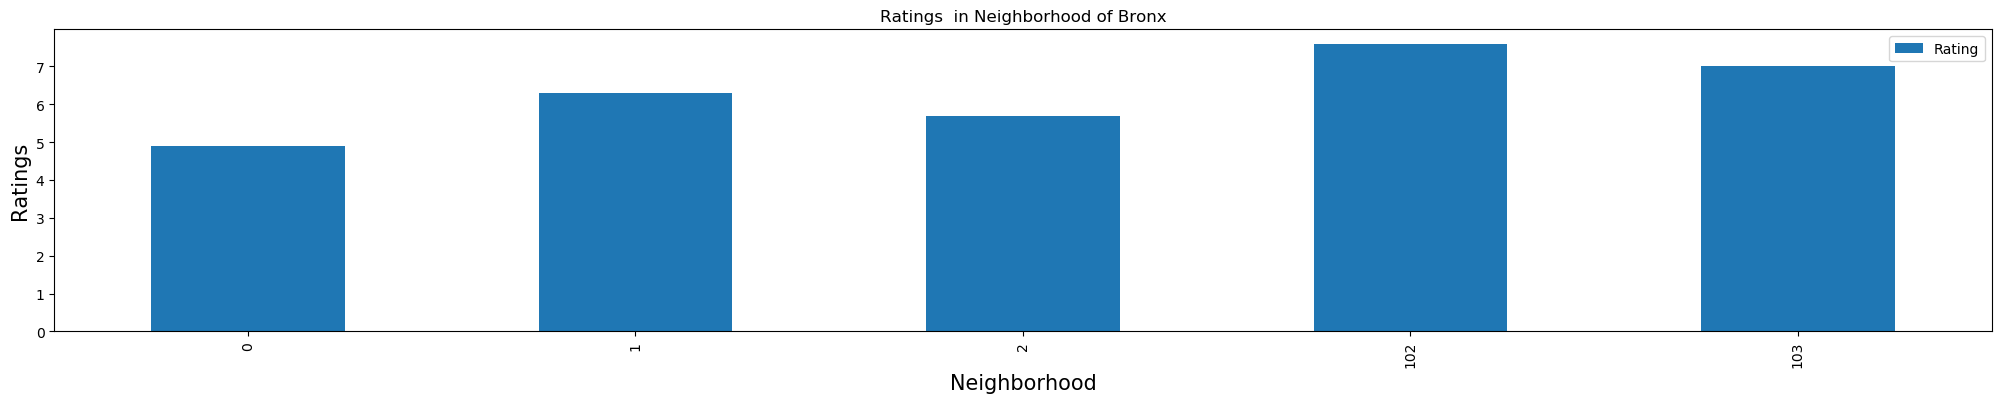

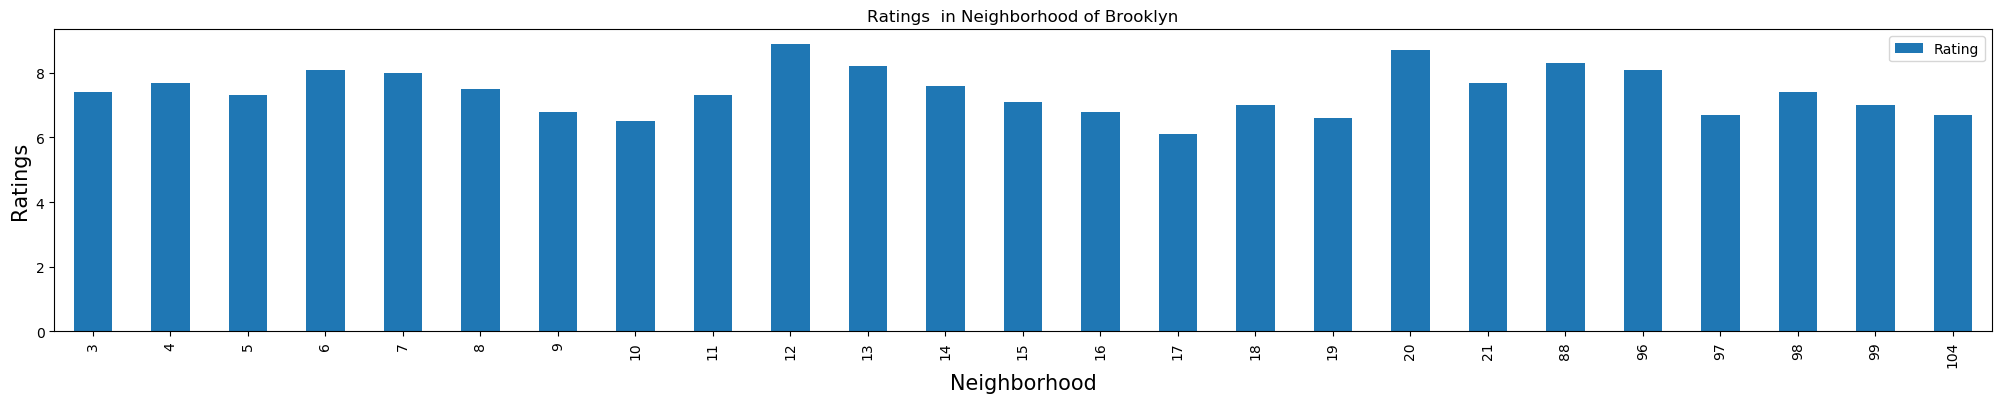

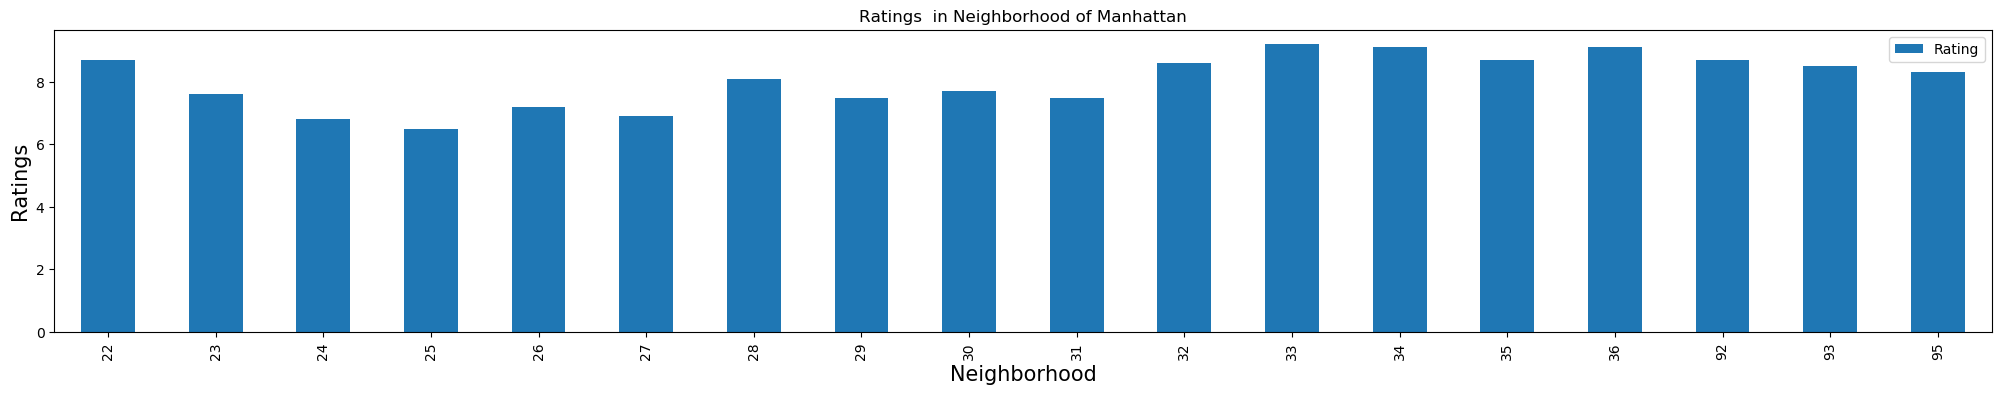

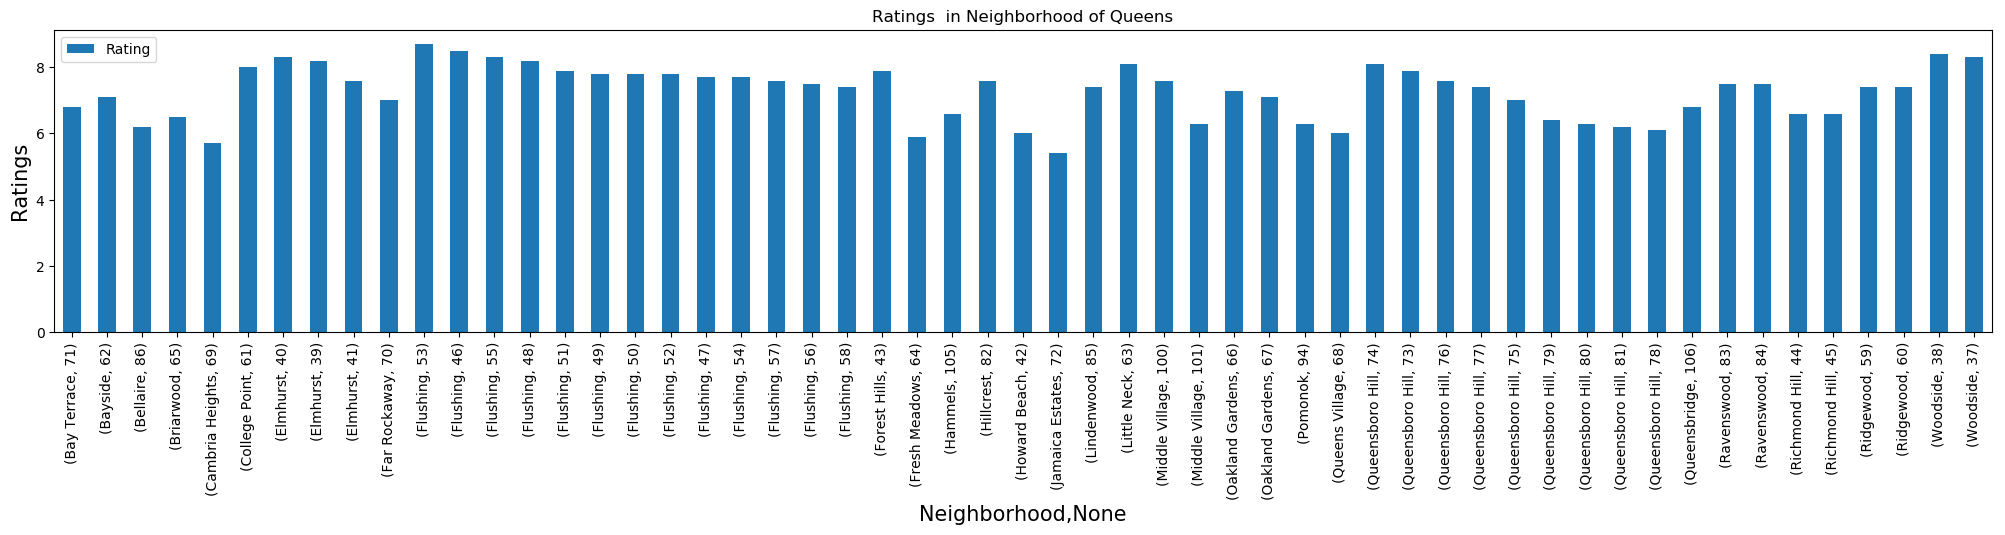

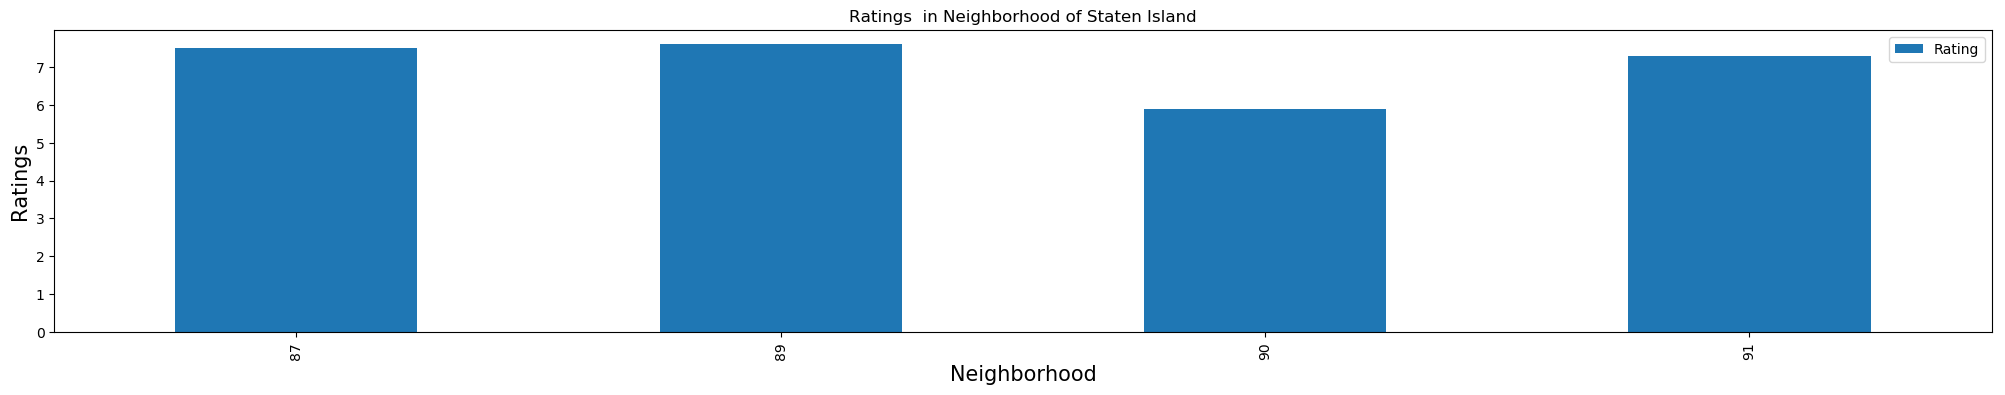

In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt1
import matplotlib.pyplot as plt2
import matplotlib.pyplot as plt3
import matplotlib.pyplot as plt4
plt.figure(figsize=(25,4), dpi = 100)
# title 1
plt.title('Ratings  in Neighborhood of Bronx')
plt.xlabel('Neighborhood', fontsize = 15)
plt.ylabel('Ratings', fontsize=15)
chinese_all[chinese_all['Borough']=='Bronx'].groupby('Neighborhood')['Rating'].nlargest(90).plot(kind='bar')
plt.legend()
plt1.figure(figsize=(25,4), dpi = 100)
# title 2
plt1.title('Ratings  in Neighborhood of Brooklyn')
plt1.xlabel('Neighborhood', fontsize = 15)
plt1.ylabel('Ratings', fontsize=15)
chinese_all[chinese_all['Borough']=='Brooklyn'].groupby('Neighborhood')['Rating'].nlargest(90).plot(kind='bar')
plt1.legend()

plt2.figure(figsize=(25,4), dpi = 100)
# title 3
plt2.title('Ratings  in Neighborhood of Manhattan')
plt2.xlabel('Neighborhood', fontsize = 15)
plt2.ylabel('Ratings', fontsize=15)
chinese_all[chinese_all['Borough']=='Manhattan'].groupby('Neighborhood')['Rating'].nlargest(90).plot(kind='bar')
plt2.legend()
plt3.figure(figsize=(25,4), dpi = 100)
# title 4
plt3.title('Ratings  in Neighborhood of Queens')
plt3.xlabel('Neighborhood', fontsize = 15)
plt3.ylabel('Ratings', fontsize=15)
chinese_all[chinese_all['Borough']=='Queens'].groupby('Neighborhood')['Rating'].nlargest(90).plot(kind='bar')
plt3.legend()

plt4.figure(figsize=(25,4), dpi = 100)
# title 5
plt4.title('Ratings  in Neighborhood of Staten Island')
plt4.xlabel('Neighborhood', fontsize = 15)
plt4.ylabel('Ratings', fontsize=15)
chinese_all[chinese_all['Borough']=='Staten Island'].groupby('Neighborhood')['Rating'].nlargest(90).plot(kind='bar')
plt4.legend()

#plt.show()
#plt1.show()
#plt2.show()
#plt3.show()
#plt4.show()


## Calculation of Average Ratings w.r.t. Neighborhoods

In [139]:
chinese_all_csv_nei=chinese_all_csv.groupby('Neighborhood',as_index=False).mean()[['Neighborhood','Rating']]
chinese_all_csv_nei.columns=['Neighborhood','Average Rating']

In [140]:
chinese_all_csv_nei.sort_values(['Average Rating'],ascending=False).head(10)

,Neighborhood,Average Rating
12,Chelsea,9.20
39,Lower East Side,9.10
59,West Village,9.10
61,Windsor Terrace,8.90
40,Marine Park,8.70
55,Tribeca,8.70
13,Chinatown,8.70
15,Civic Center,8.60
16,Clinton,8.60
62,Woodside,8.35


#### Above are the top neighborhoods with top average rating of Chinese resturants

In [160]:
chinese_all_csv_bor=chinese_all_csv.groupby('Borough',as_index=False).mean()[['Borough','Rating']]
chinese_all_csv_bor.columns=['Borough','Average Rating']

In [161]:
chinese_all_csv_bor.sort_values(['Average Rating'],ascending=False).head()

,Borough,Average Rating
2,Manhattan,8.038889
1,Brooklyn,7.420000
3,Queens,7.232143
4,Staten Island,7.075000
0,Bronx,5.975000


## Visualization of Avrage Rating on each Borough on Graph

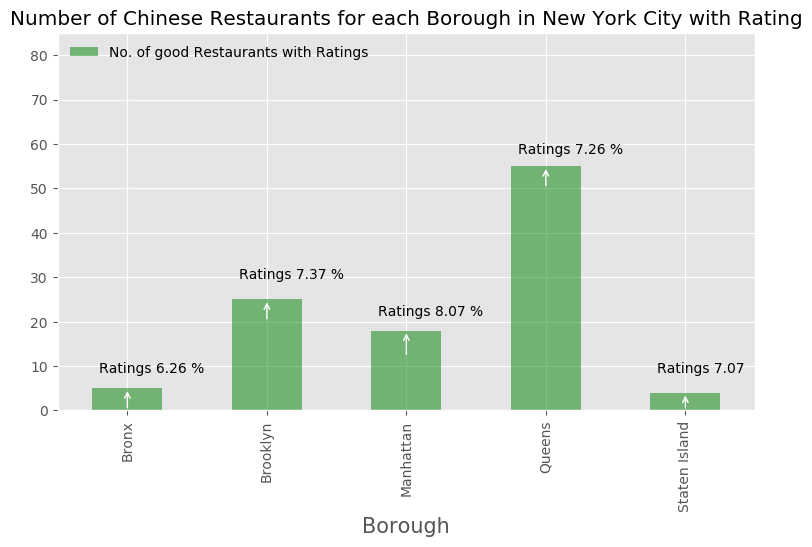

In [224]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Chinese Restaurants for each Borough in New York City with Rating')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
chinese_all_csv.groupby('Borough')['ID'].count().plot(kind='bar', color=['green'],alpha=0.5, stacked=True)
#legend
plt.legend( ['No. of good Restaurants with Ratings'],loc='upper left', frameon=False)
plt.annotate("",
            xy=(0, 5), xycoords='data',
            xytext=(0, 0), textcoords='data',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3", linewidth=1, color = 'white') )
plt.annotate("",
            xy=(1, 25), xycoords='data',
            xytext=(1, 20), textcoords='data',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3", linewidth=1, color = 'white') )
plt.annotate("",
            xy=(2, 18), xycoords='data',
            xytext=(2, 12), textcoords='data',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3", linewidth=1, color = 'white') )
plt.annotate("",
            xy=(3, 55), xycoords='data',
            xytext=(3, 50), textcoords='data',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3", linewidth=1, color = 'white') )
plt.annotate("",
            xy=(4, 4), xycoords='data',
            xytext=(4, 0), textcoords='data',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3", linewidth=1, color = 'white') )
plt.annotate("Ratings 6.26 %", xy=(-0.2, 0.1), xycoords=("data", "axes fraction"))
plt.annotate("Ratings 7.37 %", xy=(0.8, 0.35), xycoords=("data", "axes fraction"))
plt.annotate("Ratings 8.07 %", xy=(1.8, 0.25), xycoords=("data", "axes fraction"))
plt.annotate("Ratings 7.26 %", xy=(2.8, 0.68), xycoords=("data", "axes fraction"))
plt.annotate("Ratings 7.07", xy=(3.8, 0.1), xycoords=("data", "axes fraction"))
#displays the plot
plt.ylim(top=85)
plt.show()


## Visual comparison between , No. of Chinese Restaurants and Average Rating w.r.t. neighborhood numbers in each Borough

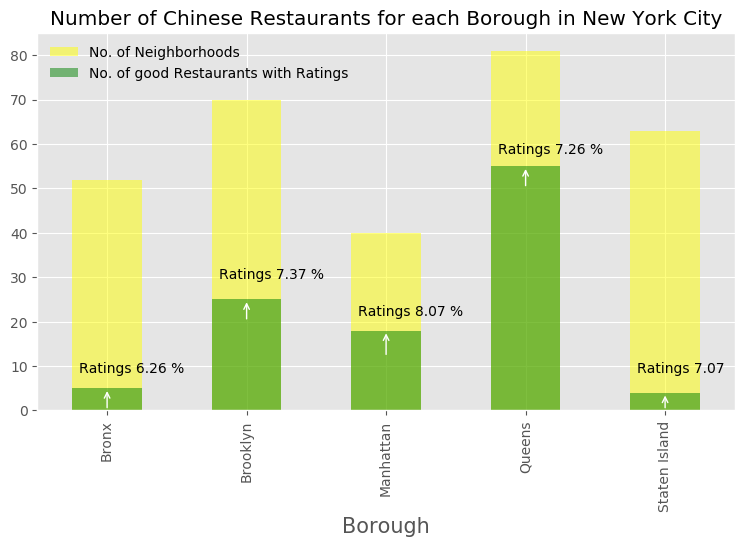

In [225]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')




plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Chinese Restaurants for each Borough in New York City')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
#plt.ylabel('No.of Chinese Restaurants', fontsize=15)
#giving a bar plot
new_york_data.groupby('Borough')['Neighborhood'].count().plot(kind='bar', color=['yellow'],alpha=0.5, stacked=True)
chinese_all_csv.groupby('Borough')['ID'].count().plot(kind='bar', color=['green'],alpha=0.5, stacked=True)
#legend
plt.legend( ['No. of Neighborhoods','No. of good Restaurants with Ratings'],loc='upper left', frameon=False)
plt.annotate("",
            xy=(0, 5), xycoords='data',
            xytext=(0, 0), textcoords='data',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3", linewidth=1, color = 'white') )
plt.annotate("",
            xy=(1, 25), xycoords='data',
            xytext=(1, 20), textcoords='data',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3", linewidth=1, color = 'white') )
plt.annotate("",
            xy=(2, 18), xycoords='data',
            xytext=(2, 12), textcoords='data',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3", linewidth=1, color = 'white') )
plt.annotate("",
            xy=(3, 55), xycoords='data',
            xytext=(3, 50), textcoords='data',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3", linewidth=1, color = 'white') )
plt.annotate("",
            xy=(4, 4), xycoords='data',
            xytext=(4, 0), textcoords='data',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3", linewidth=1, color = 'white') )
plt.annotate("Ratings 6.26 %", xy=(-0.2, 0.1), xycoords=("data", "axes fraction"))
plt.annotate("Ratings 7.37 %", xy=(0.8, 0.35), xycoords=("data", "axes fraction"))
plt.annotate("Ratings 8.07 %", xy=(1.8, 0.25), xycoords=("data", "axes fraction"))
plt.annotate("Ratings 7.26 %", xy=(2.8, 0.68), xycoords=("data", "axes fraction"))
plt.annotate("Ratings 7.07", xy=(3.8, 0.1), xycoords=("data", "axes fraction"))
#displays the plot
plt.ylim(top=85)
plt.show()


## We will consider all the Chinese Restaurants with average rating greater or equal 8.5 to visualize on graph

In [226]:
#chinese_all_csv_stats=chinese_all_csv_nei[chinese_all_csv_nei['Average Rating']>=8.0]
chinese_all_csv_stats=chinese_all_csv[chinese_all_csv['Rating']>=8.5]

In [227]:
chinese_all_csv_stats=chinese_all_csv_stats.reset_index(drop=True)
chinese_all_csv_stats

,Borough,Neighborhood,ID,Name,Latitude,Longitude,Likes,Rating,Tips
0,Brooklyn,Windsor Terrace,54e39b14498e9c646b42958e,East Wind Snack Shop,40.656946,-73.980073,138.0,8.9,50.0
1,Brooklyn,Marine Park,4b5a6114f964a52043c128e3,China New Star,40.609748,-73.931344,58.0,8.7,19.0
2,Manhattan,Chinatown,4db3374590a0843f295fb69b,Spicy Village,40.715618,-73.994279,500.0,8.7,179.0
3,Manhattan,Clinton,4ea832fe8b8154b19ffa31ad,Hakkasan,40.759101,-73.996119,520.0,8.6,159.0
4,Manhattan,Chelsea,44e9b421f964a520a5371fe3,Buddakan,40.744035,-74.003116,1488.0,9.2,521.0
5,Manhattan,Lower East Side,5b380f649deb7d00399fdf9d,Kings County Imperial,40.717807,-73.980890,67.0,9.1,10.0
6,Manhattan,Tribeca,5237264111d27e8e90c10357,China Blue,40.721522,-74.010683,353.0,8.7,86.0
7,Manhattan,West Village,526eeb54498e9674b5d9034a,Decoy,40.734434,-74.006180,338.0,9.1,107.0
8,Queens,Flushing,5747a89b498ee4b7a5106556,DunHuang Lanzhou Beef Noodle,40.764454,-73.831773,34.0,8.5,10.0
9,Queens,Flushing,4d1bcddc1356224bc6410abe,OK Ryan,40.764454,-73.831773,48.0,8.7,19.0


## Plot of chinese restaurants with ratings>8.5 and number of neighborhoods

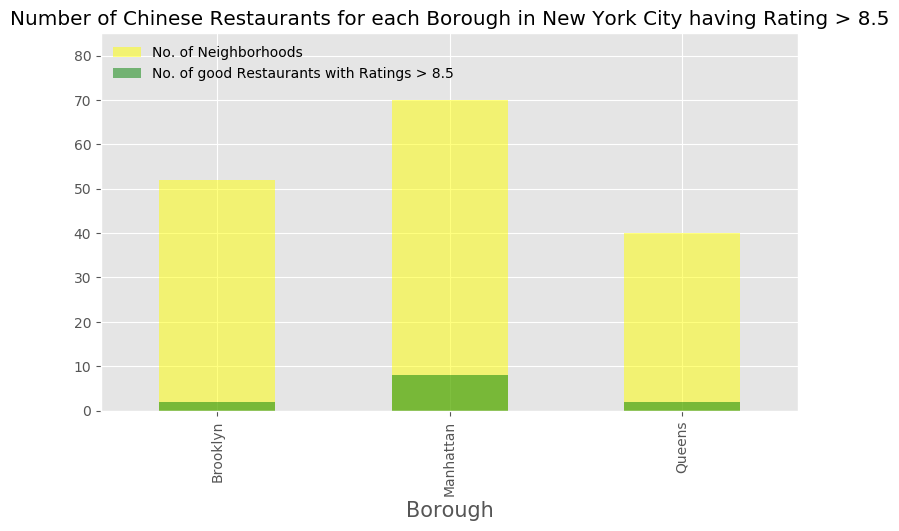

In [229]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Chinese Restaurants for each Borough in New York City having Rating > 8.5')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
#plt.ylabel('No.of Chinese Restaurants', fontsize=15)
#giving a bar plot
new_york_data.groupby('Borough')['Neighborhood'].count().plot(kind='bar', color=['yellow'],alpha=0.5, stacked=True)
chinese_all_csv_stats.groupby('Borough')['ID'].count().plot(kind='bar', color=['green'],alpha=0.5, stacked=True)
#legend
plt.legend( ['No. of Neighborhoods','No. of good Restaurants with Ratings > 8.5'],loc='upper left', frameon=False)

#displays the plot
plt.show()


## Visualization of Name, Rating, Borough on the Map

In [230]:
map2 = folium.Map(location=[40.730610, -73.935242], zoom_start=11)
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()
# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in chinese_all_csv_stats[['Latitude','Longitude']].values:
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=10, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

In [233]:
chinese_all_csv_stats['Label']=chinese_all_csv_stats['Neighborhood']+', '+chinese_all_csv_stats['Borough']+'('+chinese_all_csv_stats['Rating'].map(str)+')'
# add pop-up text to each marker on the map
for lat, lng, label in chinese_all_csv_stats[['Latitude','Longitude','Label']].values:
    folium.Marker([lat, lng], popup=label).add_to(map2)        
# add incidents to map
map2.add_child(incidents)


### Conclusion
 - Chelsea (Manhattan, 9.2), Lower East Side (Manhattan, 9.1), West Village(Manhattan, 9.1), China Town (Manhattan, 8.7), Civic Center (Manhattan, 8.7),Tribeca (Manhattan, 8.7), Clinton (Manhattan, 8.6), Winsdor(Brooklyn, 8.9), Marine Park(Brooklyn, 8.7),  Flushing(Queens, 8.7) are some of the best neighborhoods for Chinese cuisine.
 - Manhattan is mostly high rating Chinese Resturant Market
 - The ranks of Bronx in terms of average rating of Chinese Resturants is last.
 - Even though Staten Island is in the fourth position interms of average rating, but the there are lots of space available for new chinese restaurnts with less competetaion (this data reveled from the Graph "Visual comparison between , No. of Chinese Restaurants and Average Rating w.r.t. neighborhood numbers in each Borough") 
 - Manhattan may be a good place for opening a new Chinese restaurants if we can compete with other High Rating restaurants.
### My Opinion 
 - I will prefer <u> Brooklyn <u> for opening a new Chinese restaurants because Brooklyn is in the second position in terms of rating but in comparison to Manhattan the available locality is higher and at the same time the only two available restaurants having ratings above 8.5.
 

### Assumptions
 - The conclusion of the project totally depends on the Rankings, Likes and Tips availble in Foursquare.
 - I did not take into account those restaurants for which the data of the Rankings, Likes and Tips are not availble.